In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
data = pd.read_csv('/Users/admin/Desktop/Учеба/Docs/water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='mortality', ylabel='hardness'>

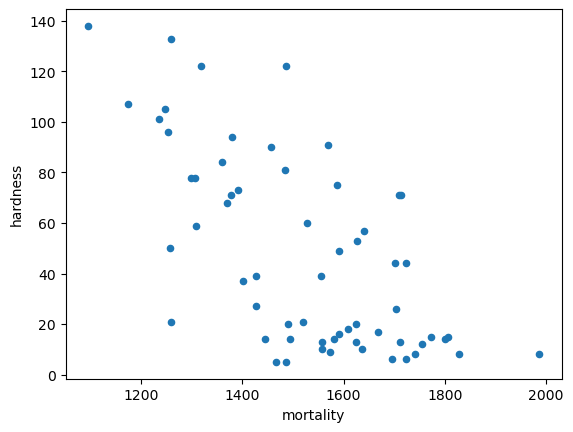

In [169]:
data.plot(kind='scatter', x='mortality', y='hardness')

In [170]:
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [171]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [173]:
X = data[['mortality']]
y = data['hardness']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [175]:
X_train.shape

(42, 1)

In [176]:
X_test.shape
y_train.shape

(42,)

In [177]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [178]:
model.coef_

array([-0.12670202])

In [179]:
model.intercept_

239.3678426140957

In [180]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

In [181]:
y_test

0     105
5      10
46     14
31     44
13     78
55     20
34    133
49     75
12     21
40      6
33     59
59     81
16     39
3      14
53     71
17     39
8      10
6      15
41    101
Name: hardness, dtype: int64

Коэффициента детерминации

In [182]:
model.score(X_test, y_test)

0.4948982822876836

Коэффициент детерминации достаточно низкий, что показывает о неприемлемоси модели

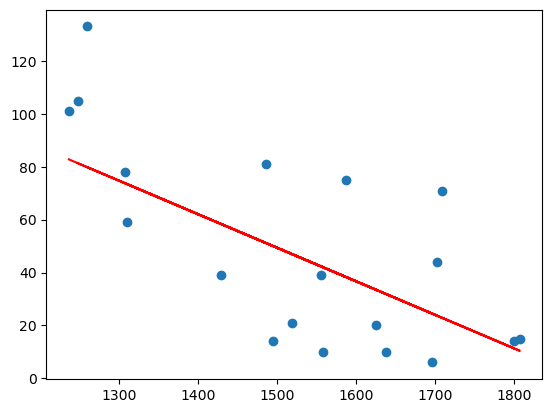

In [183]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [184]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [185]:
X_const = sm.add_constant(X_train)

In [186]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           7.83e-06
Time:                        14:51:19   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

Text(0, 0.5, 'Остатки')

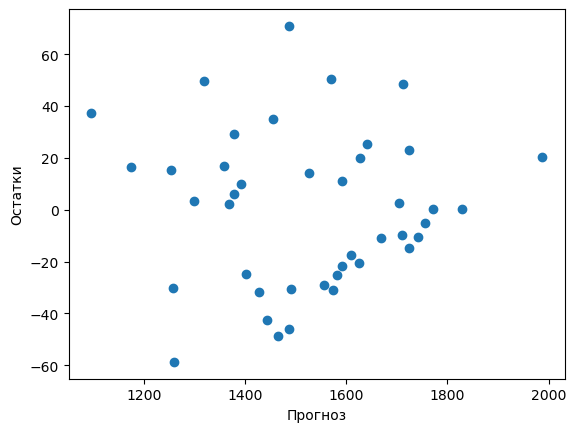

In [187]:
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

## Итог: Есть незначительная связь между этими показателями, но модель линейной регрессии плохо подхадит для аназиза, либо мало данных для анализа  

In [188]:
data_North = data[data['location'] == 'North'] # Делим данные по значению location
data_South = data[data['location'] == 'South'] 

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='mortality', ylabel='hardness'>

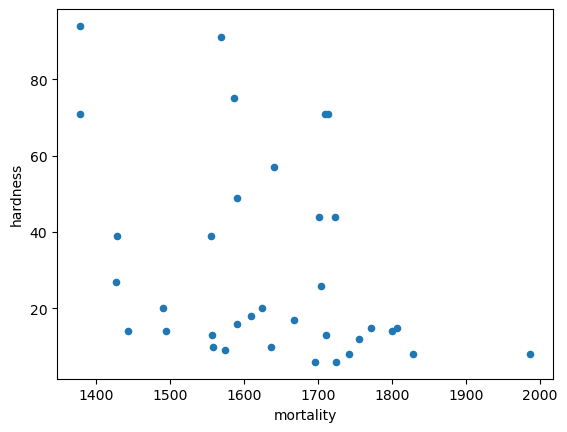

In [189]:
data_North.plot(kind='scatter', x='mortality', y='hardness')

<AxesSubplot: xlabel='mortality', ylabel='hardness'>

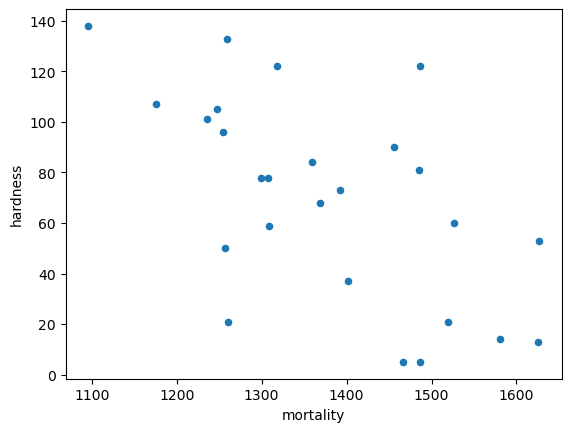

In [190]:
data_South.plot(kind='scatter', x='mortality', y='hardness')

In [191]:
data_North[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [192]:
data_South[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [193]:
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Коэффициент корреляции сильно снизился, особенно в data_North

In [194]:
data_North[['mortality', 'hardness']].corr(method='spearman')


,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [195]:
data_South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [196]:
X_n = data_North[['mortality']]
y_n = data_North['hardness']

X_s = data_South[['mortality']]
y_s = data_South['hardness']

X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.30, random_state=42)

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.40, random_state=42)

In [197]:
X_n_train.shape
X_n_test.shape
y_n_train.shape

X_s_train.shape
X_s_test.shape
y_s_train.shape

(15,)

In [198]:
model_n = LinearRegression()
model_n.fit(X_n_train, y_n_train)

model_s = LinearRegression()
model_s.fit(X_s_train, y_s_train)

LinearRegression()

In [199]:
model_n.coef_

array([-0.09774218])

In [200]:
model_s.coef_

array([-0.18872303])

In [201]:
model_n.score(X_n_test, y_n_test)

-0.34863672627416675

In [202]:
model_s.score(X_s_test, y_s_test)

-0.04857423881614542

Отрицательные значении говорят, что наша модель работает хуже чем деление на среднее.
И зависимость по отдельности не сохраняется

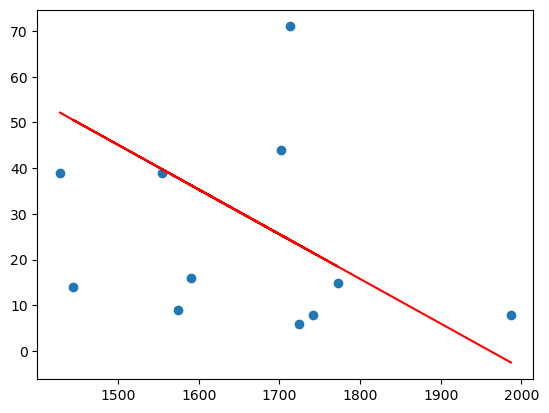

In [203]:
y_n_pred = model_n.predict(X_n_test)
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')

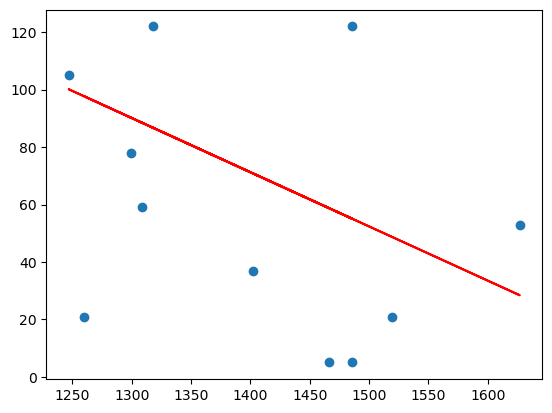

In [204]:
y_s_pred = model_s.predict(X_s_test)
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')

In [205]:
X_n_const = sm.add_constant(X_n_train)
X_s_const = sm.add_constant(X_s_train)

In [206]:
model_n = sm.OLS(y_n_train, X_n_const)
results_n = model_n.fit()
print(results_n.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sun, 29 Jan 2023   Prob (F-statistic):             0.0316
Time:                        14:51:20   Log-Likelihood:                -111.11
No. Observations:                  24   AIC:                             226.2
Df Residuals:                      22   BIC:                             228.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.7280     69.297      2.767      0.0

In [207]:
model_s = sm.OLS(y_s_train, X_s_const)
results_s = model_s.fit()
print(results_s.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     23.67
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           0.000309
Time:                        14:51:20   Log-Likelihood:                -66.701
No. Observations:                  15   AIC:                             137.4
Df Residuals:                      13   BIC:                             138.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        335.4532     53.011      6.328      0.0

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'Остатки')

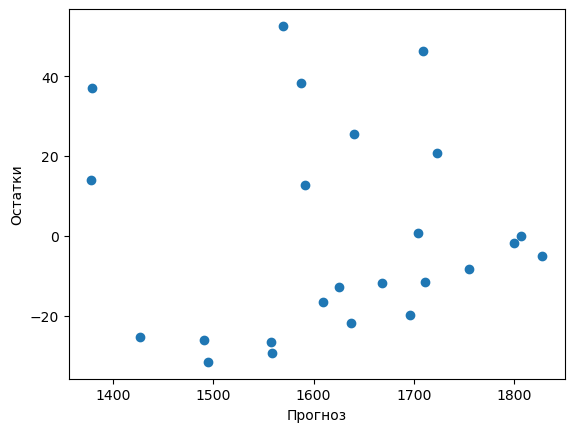

In [208]:
plt.scatter(x=X_n_const.iloc[:, 1], y=results_n.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

Text(0, 0.5, 'Остатки')

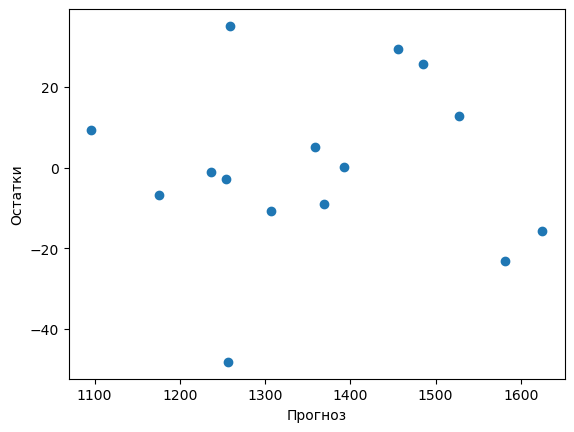

In [209]:
plt.scatter(x=X_s_const.iloc[:, 1], y=results_s.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')